<a href="https://colab.research.google.com/github/Supreme-YS/ML/blob/main/cnn_basic_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from tensorflow.keras.models     import Sequential , Model
from tensorflow.keras.layers     import Activation , Dense , BatchNormalization , Dropout ,Flatten, Conv2D, MaxPooling2D , AveragePooling2D , GlobalMaxPooling2D , ZeroPadding2D , Input
from tensorflow.keras.optimizers import SGD , Adam , RMSprop
from tensorflow.keras.utils      import plot_model , to_categorical
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


from sklearn.model_selection     import train_test_split
from sklearn.preprocessing       import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.model_selection     import KFold
from sklearn.ensemble            import VotingClassifier
from sklearn.metrics             import accuracy_score



import matplotlib.pyplot as plt

import pandas  as pd
import numpy   as np
import seaborn as sns

# dataset
from tensorflow.keras.datasets   import cifar10 , mnist

# from tensorflow.keras.datasets.mnist import load_data
# from tensorflow.keras.datasets.fashion_mnist import load_data
# from sklearn.datasets            import load_breast_cancer

from sklearn.datasets            import load_digits


In [4]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

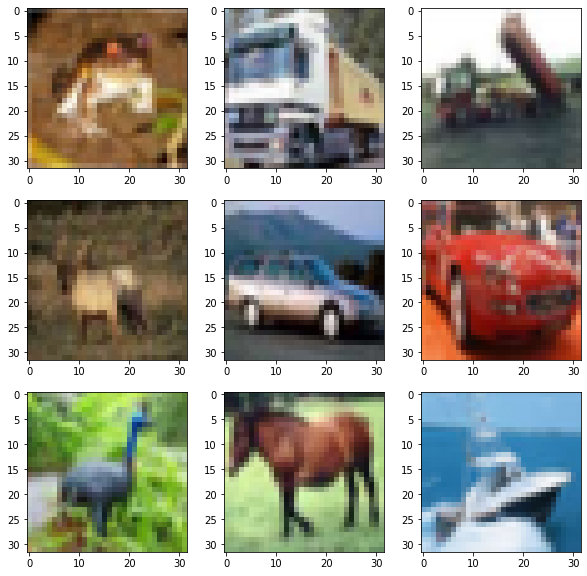

In [11]:
fig = plt.figure(figsize=(10, 10))
for i in range(9) :
    fig.add_subplot(3,3,i+1)
    plt.imshow(X_train[i])

In [12]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
fig = plt.figure(figsize=(10, 10))
for i in range(9) :
    fig.add_subplot(3,3,i+1)
    plt.imshow(X_train[i])

Filter 차이

In [33]:
# Convolution Layer -> Input
# Conv2D(input_shape, filters, kernel_size, strides, padding)
# padding = valid -> 유효한 영역만 출력 (출력이미지는 입력이미지보다 작다)
# padding = same  -> 출력이미지는 입력이미지와 같은 크기

model = Sequential()
# 커널, 필터
model.add( Conv2D(input_shape=(10, 10, 3), filters=10, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
print(model.output_shape)

# 풀링
# model.add( MaxPooling2D(pool_size=(2,2), strides=(1,1),  padding='valid' ) ) 
model.add( AveragePooling2D(pool_size=(2,2), padding='valid'))
print(model.output_shape)

# Flatten
model.add( Flatten())
print(model.output_shape)

# Fully Connected
model.add( Dense(50))
print( model.output_shape)

(None, 10, 10, 10)
(None, 5, 5, 10)
(None, 250)
(None, 50)


In [34]:
input_layer   = Input(shape=(10, 10, 3))
padding_layer = Conv2D(filters=10, kernel_size=(3,3), strides=(1,1), padding='valid')(input_layer)

model = Model(inputs = input_layer, outputs = padding_layer)

model.output_shape

(None, 8, 8, 10)

### 8 * 8 digit image CNN

In [37]:
data = load_digits()
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

label - > 0


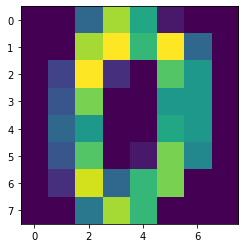

In [38]:
plt.imshow(data.images[0])
print('label - >', data.target[0])

In [39]:
X_data = data.images
y_data = data.target

In [40]:
X_data.shape, y_data.shape

((1797, 8, 8), (1797,))

In [41]:
# 갯수, 행, 렬
X_data.shape[0], X_data.shape[1], X_data.shape[2]

(1797, 8, 8)

In [43]:
# color 즉, 3차원 R,G,B 라는 3채널로 만들기 위해 reshape 을 해준다.
# 지금은 depth를 1로 만듬, 즉, 흑백을 의미한다.
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], X_data.shape[2], 1)
X_data.shape


(1797, 8, 8, 1)

In [44]:
y_data = to_categorical(y_data)
y_data[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [45]:
X_data.shape, y_data.shape

((1797, 8, 8, 1), (1797, 10))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size =  0.2, random_state= 777)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 8, 8, 1), (360, 8, 8, 1), (1437, 10), (360, 10))

####모델 만들기

In [47]:
model = Sequential()

####합성곱 레이어 만들기

In [48]:
model.add( Conv2D(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters=10, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))

#### 풀링 레이어 만들기

In [49]:
model.add( MaxPooling2D(pool_size=(2,2), padding='valid'))

#### Flatten , 1차원 벡터 변환 및 Dense 레이어 연결

In [50]:
model.add( Flatten() )
model.add( Dense(50, activation='relu'))

model.add( Dense(10, activation='softmax'))

In [51]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 6, 6, 10)          100       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 90)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                4550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 5,160
Trainable params: 5,160
Non-trainable params: 0
_________________________________________________________________


In [52]:
adam = Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [53]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split=0.2, epochs=100, verbose = 0)

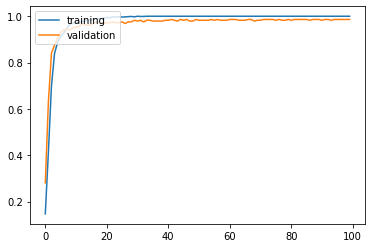

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [55]:
results = model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 4ms/step - loss: 0.1083 - accuracy: 0.9806


In [56]:
print('Test accuracy :', results[1])

Test accuracy : 0.980555534362793
